# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# Loading the dataset

In [2]:
movie = pd.read_csv ("movies.csv")
m_links = pd.read_csv ("links.csv")
m_ratings = pd.read_csv ("ratings.csv")
m_tags = pd.read_csv ("tags.csv")

## Checking Shape of the Data

In [3]:
movie.shape
m_ratings.shape

(9742, 3)

(100836, 4)

In [4]:
m_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Unique User IDs

In [5]:
m_ratings["userId"].nunique()

610

In [6]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
merged_m_data = pd.merge(movie, m_ratings, on='movieId')

In [8]:
merged_m_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [9]:
merged_m_data["rating"].unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. ])

In [10]:
count_ratings = merged_m_data['title'].value_counts()

# Find the movie with the highest number of ratings
highest_rated_movie = count_ratings.idxmax()
highest_ratings_count = count_ratings.max()

In [11]:
print(f"The movie with the highest number of ratings is '{highest_rated_movie}' with {highest_ratings_count} ratings.")

The movie with the highest number of ratings is 'Forrest Gump (1994)' with 329 ratings.


In [12]:
m_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [13]:
concat_mdata= pd.merge(merged_m_data, m_tags, on='movieId')
concat_mdata

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


## Checking the tags of a Movie "Matrix, The (1999)"

In [14]:
concat_mdata[["title","tag"]]

,title,tag
0,Toy Story (1995),pixar
1,Toy Story (1995),pixar
2,Toy Story (1995),fun
3,Toy Story (1995),pixar
4,Toy Story (1995),pixar
...,...,...
233208,Solo: A Star Wars Story (2018),star wars
233209,Gintama: The Movie (2010),anime
233210,Gintama: The Movie (2010),comedy
233211,Gintama: The Movie (2010),gintama


In [15]:
movie_name = 'Matrix, The (1999)'
movie_tags = concat_mdata[concat_mdata['title'] == "Matrix, The (1999)"]['tag']

print(f"tag for {movie_name}:")
print(movie_tags)

tag for Matrix, The (1999):
142140          martial arts
142141                sci-fi
142142    alternate universe
142143            philosophy
142144      post apocalyptic
                 ...        
143525          martial arts
143526                sci-fi
143527    alternate universe
143528            philosophy
143529      post apocalyptic
Name: tag, Length: 1390, dtype: object


In [16]:
movie_name = 'Matrix, The (1999)'
tags_to_check = ["alternate universe"]

# Filter the DataFrame for the specific movie
filtered_tags = concat_mdata[concat_mdata['title'] == "Matrix, The (1999)"]

# Check if the specific tag is present
tags_exists = tags_to_check in filtered_tags['tag'].unique()

print(f"Does the rating {tags_to_check} exist for {movie_name}? {tags_exists}")

Does the rating ['alternate universe'] exist for Matrix, The (1999)? True


In [22]:
def check_tags_for_movie(data, movie, tags_to_check):
    """
    Check if a particular movie has all the specified tags and list those tags.

    Parameters:
    - df: The DataFrame containing movie tags.
    - movie: The name of the movie.
    - tags_to_check: A list of tags to check for the specified movie.

    Returns:
    - dict: A dictionary with tag names and their presence status.
    """
    # Filter the DataFrame for the specific movie
    filtered_tags = concat_mdata[concat_mdata['title'] == "Matrix, The (1999)"]
    
    # Get the unique tags for the movie
    movie_tags = set(filtered_tags['tag'].unique())
    
    # Check each tag and store the results
    results={}
    for tag in tags_to_check:
        results[tag] = tag in movie_tags
    
    return results


In [23]:
tags_to_check = ['alternate universe','karate','philosophy','post apocalyptic']

# Use the function
results = check_tags_for_movie(concat_mdata, movie_name, tags_to_check)

# Print the results
for tag, is_present in results.items():
    print(f"Tag '{tag}' is present for '{movie_name}': {is_present}")

Tag 'alternate universe' is present for 'Matrix, The (1999)': True
Tag 'karate' is present for 'Matrix, The (1999)': False
Tag 'philosophy' is present for 'Matrix, The (1999)': True
Tag 'post apocalyptic' is present for 'Matrix, The (1999)': True


## To get the Average rating for a perticular movie

In [24]:
mname="Terminator 2: Judgment Day (1991)"
filter_mov = merged_m_data[merged_m_data['title']== mname]
average_ratings_count = filter_mov["rating"].mean()

print(f"the movie with the average rating is '{mname }' with {average_ratings_count: .2f} ratings")

the movie with the average rating is 'Terminator 2: Judgment Day (1991)' with  3.97 ratings


## Data Distribution of a Movie "Fight Club (1999)"

In [25]:
movie_name = "Fight Club (1999)"
movie_data = merged_m_data[merged_m_data['title'] == movie_name]

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


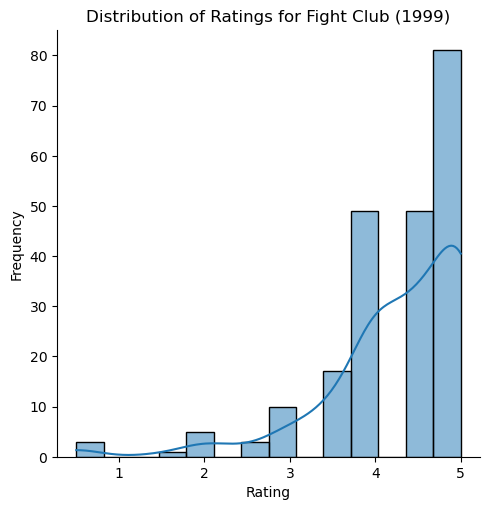

In [26]:
sns.displot(movie_data['rating'], kde=True)  # KDE adds a Kernel Density Estimate line
plt.title(f'Distribution of Ratings for {movie_name}')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show();

## Most popular movie based on  average user ratings
-- Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [27]:
grouped_rating= m_ratings.groupby("movieId").agg(average_rating=("rating", "mean"), count_ratings=("rating", "count"))

In [28]:
grouped_rating

,average_rating,count_ratings
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49
...,...,...
193581,4.000000,1
193583,3.500000,1
193585,3.500000,1


In [29]:
movie_ratings = pd.merge(grouped_rating, movie, on='movieId', how='inner')

In [30]:
movie_ratings

,movieId,average_rating,count_ratings,title,genres
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance
3,4,2.357143,7,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.071429,49,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9719,193581,4.000000,1,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,3.500000,1,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,3.500000,1,Flint (2017),Drama
9722,193587,3.500000,1,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [31]:
famous_movie= movie_ratings[movie_ratings["count_ratings"]>50]

In [32]:
famous_movie

,movieId,average_rating,count_ratings,title,genres
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance
5,6,3.946078,102,Heat (1995),Action|Crime|Thriller
6,7,3.185185,54,Sabrina (1995),Comedy|Romance
...,...,...,...,...,...
8287,106782,3.916667,54,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
8354,109374,3.778846,52,"Grand Budapest Hotel, The (2014)",Comedy|Drama
8358,109487,3.993151,73,Interstellar (2014),Sci-Fi|IMAX
8457,112852,4.050847,59,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


In [33]:
most_famous_movie=famous_movie.loc[famous_movie["average_rating"].idxmax()]

In [34]:
most_famous_movie

movieId                                        318
average_rating                            4.429022
count_ratings                                  317
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
Name: 277, dtype: object

## Top 5 Movies

In [46]:
top_movies = famous_movie.sort_values(by='count_ratings', ascending=False).head(5)

In [48]:
top_movies[["title", "count_ratings"]]

,title,count_ratings
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278


In [37]:
SciFi_famous_movie=movie_ratings[movie_ratings["genres"]=="Sci-Fi"]

In [38]:
SciFi_famous_movie

,movieId,average_rating,count_ratings,title,genres
1718,2311,3.588235,17,2010: The Year We Make Contact (1984),Sci-Fi
1901,2526,1.833333,3,Meteor (1979),Sci-Fi
1999,2661,3.000000,1,It Came from Outer Space (1953),Sci-Fi
2002,2665,1.000000,1,Earth vs. the Flying Saucers (1956),Sci-Fi
2025,2698,2.000000,1,Zone 39 (1997),Sci-Fi
2504,3354,2.690476,21,Mission to Mars (2000),Sci-Fi
3116,4198,3.000000,1,Battle Beyond the Stars (1980),Sci-Fi
3517,4813,5.000000,1,When Worlds Collide (1951),Sci-Fi
3595,4942,4.500000,1,"Angry Red Planet, The (1959)",Sci-Fi
3888,5468,5.000000,1,20 Million Miles to Earth (1957),Sci-Fi


In [44]:
Top_SciFi_famous_movie= SciFi_famous_movie.sort_values(by='count_ratings', ascending=False).head(5)

In [45]:
Top_SciFi_famous_movie

,movieId,average_rating,count_ratings,title,genres
9374,164179,3.980769,26,Arrival (2016),Sci-Fi
2504,3354,2.690476,21,Mission to Mars (2000),Sci-Fi
9586,176371,3.805556,18,Blade Runner 2049 (2017),Sci-Fi
1718,2311,3.588235,17,2010: The Year We Make Contact (1984),Sci-Fi
8451,112623,3.433333,15,Dawn of the Planet of the Apes (2014),Sci-Fi


In [68]:
m_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [69]:
m_links.sort_values(by='imdbId', ascending=False).head(5)


,movieId,imdbId,tmdbId
9740,193587,8391976,483455.0
9695,184791,7924798,502616.0
9677,183227,7808620,494368.0
9675,183197,7807952,488223.0
9671,182749,7738550,487156.0


In [70]:
merge_for_imdb=pd.merge(SciFi_famous_movie,m_links, on= "movieId")

In [71]:
merge_for_imdb

,movieId,average_rating,count_ratings,title,genres,imdbId,tmdbId
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,6,3.946078,102,Heat (1995),Action|Crime|Thriller,113277,949.0
4,7,3.185185,54,Sabrina (1995),Comedy|Romance,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,3.916667,54,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,993846,106646.0
432,109374,3.778846,52,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2278388,120467.0
433,109487,3.993151,73,Interstellar (2014),Sci-Fi|IMAX,816692,157336.0
434,112852,4.050847,59,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2015381,118340.0


In [89]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('div', attrs={"class":'lm-Widget'})
    return imdb_rating.text if imdb_rating else np.nan

In [90]:
imdbId = "8391976"  # IMDb ID for "The Matrix"
rating = scrapper(imdbId)
print(f"The IMDb rating for the movie is: {rating}")

The IMDb rating for the movie is: nan


In [82]:
merge_for_SCIFI_imdb=pd.merge(SciFi_famous_movie,m_links, on= "movieId")

In [86]:
merge_for_SCIFI_imdb

,movieId,average_rating,count_ratings,title,genres,imdbId,tmdbId
0,2311,3.588235,17,2010: The Year We Make Contact (1984),Sci-Fi,86837,4437.0
1,2526,1.833333,3,Meteor (1979),Sci-Fi,79550,40160.0
2,2661,3.000000,1,It Came from Outer Space (1953),Sci-Fi,45920,19483.0
3,2665,1.000000,1,Earth vs. the Flying Saucers (1956),Sci-Fi,49169,18158.0
4,2698,2.000000,1,Zone 39 (1997),Sci-Fi,120554,67067.0
5,3354,2.690476,21,Mission to Mars (2000),Sci-Fi,183523,2067.0
6,4198,3.000000,1,Battle Beyond the Stars (1980),Sci-Fi,80421,14460.0
7,4813,5.000000,1,When Worlds Collide (1951),Sci-Fi,44207,16380.0
8,4942,4.500000,1,"Angry Red Planet, The (1959)",Sci-Fi,52564,6974.0
9,5468,5.000000,1,20 Million Miles to Earth (1957),Sci-Fi,50084,15096.0


In [91]:
merge_for_SCIFI_imdb.sort_values(by='imdbId', ascending=False).head(5)

,movieId,average_rating,count_ratings,title,genres,imdbId,tmdbId
25,103596,1.875000,4,Sharknado (2013),Sci-Fi,2724064,205321.0
34,164179,3.980769,26,Arrival (2016),Sci-Fi,2543164,329865.0
26,112623,3.433333,15,Dawn of the Planet of the Apes (2014),Sci-Fi,2103281,119450.0
36,176371,3.805556,18,Blade Runner 2049 (2017),Sci-Fi,1856101,335984.0
30,147376,4.750000,2,Doctor Who: A Christmas Carol (2010),Sci-Fi,1672218,315620.0


In [93]:
merge_for_imdb.sort_values(by='imdbId', ascending=False).head()

,movieId,average_rating,count_ratings,title,genres,imdbId,tmdbId
432,109374,3.778846,52,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2278388,120467.0
434,112852,4.050847,59,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2015381,118340.0
430,99114,3.943662,71,Django Unchained (2012),Action|Drama|Western,1853728,68718.0
426,81845,4.043103,58,"King's Speech, The (2010)",Drama,1504320,45269.0
435,122904,3.833333,54,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,1431045,293660.0
